In [274]:
def pt1plus(pplust1, pt1, pplust2, pt2):
    return pplust1 * pt1 / (pplust1 * pt1 + pplust2 * pt2)

print(pt1plus(0.8, 0.1, 0.3, 0.9))

print(pt1plus(0.8, 0.1, 0.15, 0.9))

print(pt1plus(0.8, 0.16, 0.3, 0.84))



0.2285714285714286
0.372093023255814
0.3368421052631579


# Exercise 1

In [275]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numba import njit, prange

In [276]:
def choose(n, k):
    # if n < 0 or k < 0 or k > n:
    #     return 0
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))



In [277]:
def prior(N):
    return 1/N
def prior_const(N):
    return 1

In [278]:
def p(k, K, n, N, pr):
    # if pr:
    return choose(K, k) * choose(N - K, n - k) / choose(N, n) * pr(N)
    # else:
    #     return choose(K, k) * choose(N - K, n - k) / choose(N, n)

In [279]:
def distribution(Ns, k, K, n, pr):
    ps = np.ones_like(Ns, dtype=np.float64)
    for i in range(len(Ns)):
        ps[i] = p(k=k, K=K, n=n, N=Ns[i], pr=pr)
    return ps/np.sum(ps)

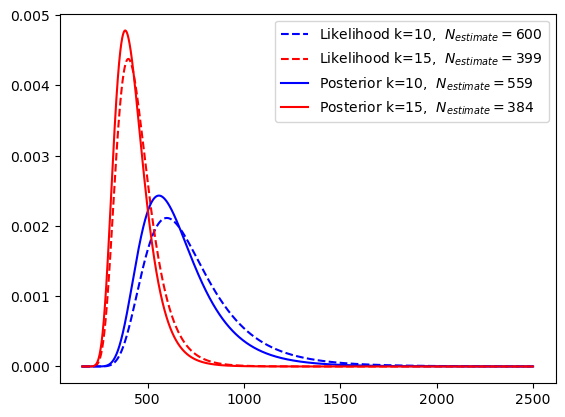

In [280]:
Ns = np.linspace(160, 2500, 2401, dtype=np.int32)
a = distribution(Ns, k=10, K=100, n=60, pr=prior_const)
plt.plot(Ns, a, label = f"Likelihood k=10,  $N_{{estimate}}=${Ns[np.argmax(a)]}", c = "blue", ls = "--")
b = distribution(Ns, k=15, K=100, n=60, pr=prior_const)
plt.plot(Ns, b, label = f"Likelihood k=15,  $N_{{estimate}}=${Ns[np.argmax(b)]}", c = "red", ls = "--")
c = distribution(Ns, k=10, K=100, n=60, pr=prior)
plt.plot(Ns, c, label = f"Posterior k=10,  $N_{{estimate}}=${Ns[np.argmax(c)]}", c = "blue")
d = distribution(Ns, k=15, K=100, n=60, pr=prior)
plt.plot(Ns, d, label = f"Posterior k=15,  $N_{{estimate}}=${Ns[np.argmax(d)]}", c = "red")

# plt.plot(Ns, distribution(Ns, k=10, K=100, n=60, pr=False), label = "Likelihood k=10", c = "blue")
# plt.plot(Ns, distribution(Ns, k=20, K=100, n=60, pr=False), label = "Likelihood k=15", c = "orange")
# plt.plot(Ns, distribution(Ns, k=10, K=100, n=60, pr=True), label = "Posterior k=10", c = "blue", ls = "--")
# plt.plot(Ns, distribution(Ns, k=20, K=100, n=60, pr=True), label = "Posterior k=15", c = "orange", ls = "--")
plt.legend();

# FIsh


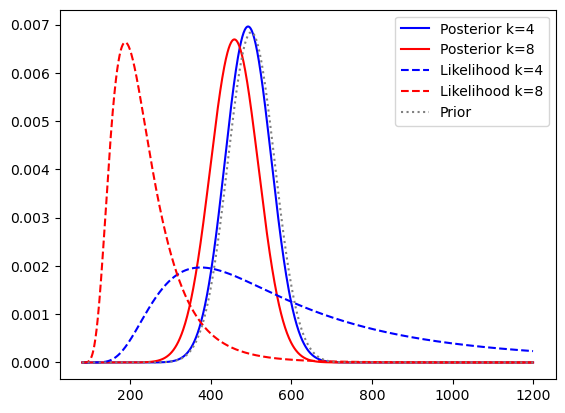

In [290]:
f = 10
df = 1
V = 5000
dV = 300
N = V/f
dN = np.sqrt((dV/f)**2 + (V/f**2 * df)**2)
def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - mu)/sigma)**2)
prior_gauss = lambda x: gaussian(x, N, dN)
# likelihood = p(args)
# posterior = prior*likelihood
Ns = np.linspace(80, 1200, 1121, dtype=np.int32)
plt.plot(Ns, distribution(Ns, k=4, K=50, n=30, pr=prior_gauss), label = "Posterior k=4", c = "blue")
plt.plot(Ns, distribution(Ns, k=8, K=50, n=30, pr=prior_gauss), label = "Posterior k=8", c = "red")
plt.plot(Ns, distribution(Ns, k=4, K=50, n=30, pr=prior_const), label = "Likelihood k=4", c = "blue", linestyle = "--")
plt.plot(Ns, distribution(Ns, k=8, K=50, n=30, pr=prior_const), label = "Likelihood k=8", c = "red", linestyle = "--")
plt.plot(Ns, prior_gauss(Ns), label = "Prior", c = "gray", linestyle = ":")
plt.legend();

# EVen more EXTREME

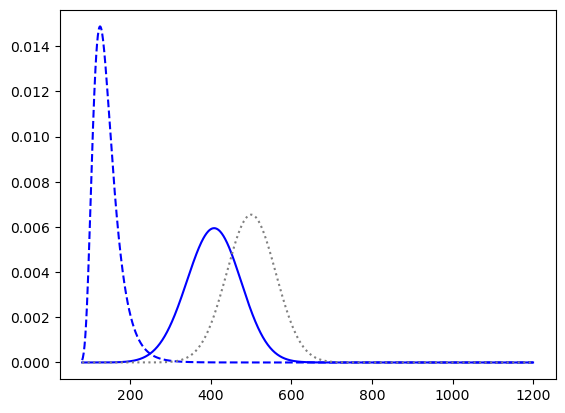

In [292]:
prior_gauss = lambda x: gaussian(x, N, 61)
plt.plot(Ns, distribution(Ns, k=12, K=50, n=30, pr=prior_gauss), label = "Posterior k=12", c = "blue")
plt.plot(Ns, distribution(Ns, k=12, K=50, n=30, pr=prior_const), label = "Likelihood k=12", c = "blue", linestyle = "--")
plt.plot(Ns, prior_gauss(Ns), label = "Prior", c = "gray", linestyle = ":");


In [309]:
Ns = np.linspace(80, 9999, 9930, dtype=np.int32)
# print(Ns)
dist = distribution(Ns, k=12, K=50, n=30, pr=prior_const)
np.sum(dist[Ns >= 409])

0.00016533971241508713

In [312]:
f_error = np.random.normal(loc=10, scale=1, size=10_000_000)
v_error = np.random.normal(loc=5000, scale=300, size=10_000_000)
N_error = v_error/f_error
np.mean(N_error), np.std(N_error)

(505.1470784949539, 60.38675338152217)